In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

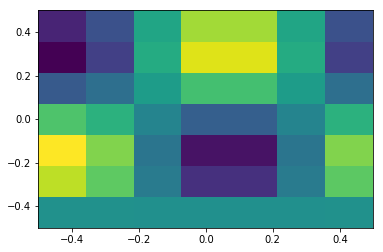

In [2]:
x = np.linspace(0,1,8)-0.5
y = np.linspace(0,1,8)-0.5
x,y = np.meshgrid(x,y,indexing='ij')
z = np.cos(x*np.pi*2)*np.sin(y*np.pi*2)
# z = (x*x+y*y)/0.5/0.5
plt.pcolormesh(x,y,z)

# Triangulación 1

Falla porque son tetraedros que no siempre están bien definidos y que no sabemos cuál cara es la correcta

```python    
from scipy.spatial import Delaunay
pointcloud = np.vstack([x.ravel(),y.ravel(),z.ravel()]).T 
d_tri = Delaunay(pointcloud)
d_triangles = d_tri.simplices.copy()
d_puntos = pointcloud[d_triangles]
```

# Triangulación 2

Usando
/usr/local/lib/python2.7/dist-packages/matplotlib/triangulation.py 

pero al final usa Triangulation con $x,y$ solamente, para el caso de 4 puntos por fila en los triángulos. Esto puede fallar al ignorar el $z$

```python
from matplotlib.tri.triangulation import Triangulation


args = [x.ravel(), y.ravel(), z.ravel()]
kwargs = {
  'triangles': d_triangles, 
  'cmap': plt.cm.gray  
}

tri, args, kwargs = Triangulation.get_from_args_and_kwargs(*args, **kwargs)

ztri = np.asarray(args[0])
# args = args[1:]

triangles = tri.get_masked_triangles()

xt = tri.x[triangles]
yt = tri.y[triangles]
zt = ztri[triangles]
```

# Triangulación final

Hacer triangulación propia en la malla de coordendas de pixeles, esto es pq conocemos la topología de la malla, asumimos que pixeles vecinos son vecinos en la realidad. 

Notar que eje x está alineado con índice $i$

In [3]:
nrows = x.shape[0]
ncols = x.shape[1]
pixel_i = np.linspace(1,nrows,nrows)
pixel_j = np.linspace(1,ncols,ncols)
pixel_i, pixel_j = np.meshgrid(pixel_i, pixel_j)

In [4]:
from matplotlib.tri.triangulation import Triangulation

triangulation = Triangulation(pixel_i.ravel(), pixel_j.ravel())

triangles = triangulation.triangles

In [19]:
xt = x.ravel()[triangles]
yt = y.ravel()[triangles]
zt = z.ravel()[triangles]

In [22]:
xt

array([[-0.35714286, -0.5       , -0.5       ],
       [-0.5       , -0.35714286, -0.35714286],
       [-0.21428571, -0.07142857, -0.21428571],
       [-0.07142857, -0.07142857, -0.21428571],
       [ 0.35714286,  0.21428571,  0.35714286],
       [ 0.21428571,  0.21428571,  0.35714286],
       [-0.07142857, -0.07142857,  0.07142857],
       [ 0.07142857,  0.07142857, -0.07142857],
       [ 0.07142857, -0.07142857, -0.07142857],
       [-0.07142857,  0.07142857,  0.07142857],
       [-0.21428571, -0.35714286, -0.35714286],
       [-0.21428571, -0.35714286, -0.21428571],
       [-0.07142857, -0.21428571, -0.21428571],
       [-0.07142857, -0.21428571, -0.07142857],
       [-0.07142857,  0.07142857,  0.07142857],
       [-0.07142857,  0.07142857, -0.07142857],
       [-0.21428571, -0.07142857, -0.07142857],
       [-0.07142857, -0.21428571, -0.21428571],
       [-0.35714286, -0.21428571, -0.35714286],
       [-0.21428571, -0.21428571, -0.35714286],
       [-0.35714286, -0.35714286, -0.5  

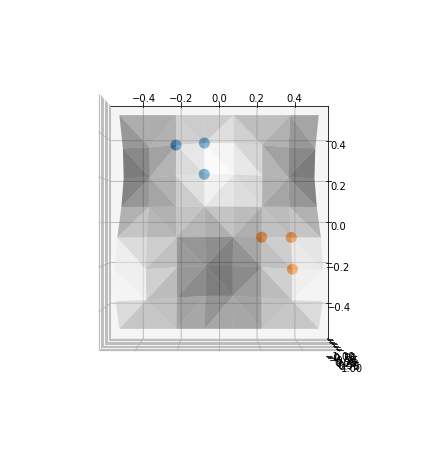

In [42]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(4*4,2*4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a = ax.plot_trisurf(x.ravel(), y.ravel(), z.ravel(), triangles=triangles, cmap=plt.cm.gray,alpha=0.5,edgecolor=None)
#     ax.scatter3D(xt[i],yt[i],zt[i],s=100)
# ax.scatter3D(x.ravel(), y.ravel(), z.ravel())
for i in range(3,5):
    ax.scatter3D(xt[i],yt[i],zt[i],s=100,alpha=1)
# fig.savefig('asdf.png',dpi=300)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
ax.view_init(elev=90., azim=-90)

#  Seleccionar sólo triángulos dentro de un polígono

Para ver qué puntos caen dentro de polígono:
Probar en coordenadas de pixeles:

https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python


In [43]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

ImportError: No module named shapely.geometry